In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df.iloc[:,:2]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.columns = ['label','text']

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Data Exploratin

Text(0, 0.5, 'Count')

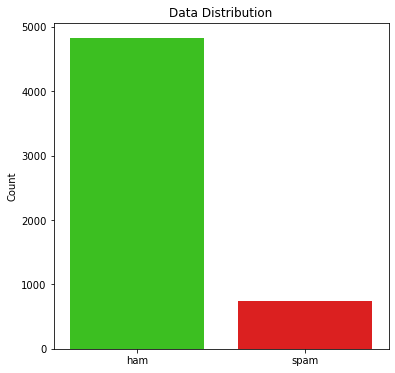

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (6,6))

s = df['label'].value_counts()
sns.barplot(x=s.index, y=s.values,
           palette=['#2AD907','#FA0101'])
plt.title('Data Distribution')
ax.set_ylabel("Count")

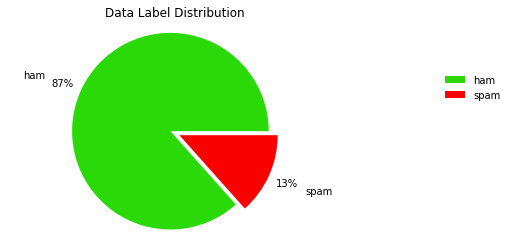

In [8]:
fig, ax = plt.subplots()
labels = ['ham', 
         'spam']
percentages = [s.values]
explode=(0.1,0)
ax.pie(s.values, explode=explode, labels=labels,  
       colors=['#2AD907','#FA0101'], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Data Label Distribution")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

In [9]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
corpus = []

In [11]:
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [12]:
i = 10 
print("Text: ",df['text'][i])
review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
print("Alphabet Only: ",review,'\n')
review = review.lower()
print("lower: ",review,'\n')
review = review.split()
print("Split: ",review,'\n')
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
print("Stem: ",review,'\n')
review = ' '.join(review)
print("Join: ",review,'\n')

Text:  I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
Alphabet Only:  I m gonna be home soon and i don t want to talk about this stuff anymore tonight  k  I ve cried enough today  

lower:  i m gonna be home soon and i don t want to talk about this stuff anymore tonight  k  i ve cried enough today  

Split:  ['i', 'm', 'gonna', 'be', 'home', 'soon', 'and', 'i', 'don', 't', 'want', 'to', 'talk', 'about', 'this', 'stuff', 'anymore', 'tonight', 'k', 'i', 've', 'cried', 'enough', 'today'] 

Stem:  ['gonna', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today'] 

Join:  gonna home soon want talk stuff anymor tonight k cri enough today 



* ###  Count Vectorizer 

In [13]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [14]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['label']= label_encoder.fit_transform(df['label']) 
df['label'].unique() 

array([0, 1])

In [15]:
y = df['label']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [17]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)
y_pred = spam_detect_model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9865470852017937

* ### Tfidf

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [21]:
from sklearn.naive_bayes import MultinomialNB
tfidf_model = MultinomialNB().fit(X_train, y_train)
y_pred = tfidf_model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9721973094170404